# Project 2: Prediction of Housing Prices In Ames

## Problem Statement

With a large amount of collected data about characteristics of houses in Ames, we would like to find out the underlying reasons and motivations for an important consideration of every house owner: **Cost of House**. One way of doing so is train a model that takes these features as inputs, where it recognizes and weighs the influence of fed features on our resultant output which in particular is the `SalePrice` and provide predictions of houses that share the same characterisitics. Therefore we aim to derive the **optimum model** that gives the **most accurate predictions** when compared to the actual house prices in our past data. With such a versatile model, it would be helpful and viable to a wide range of consumers as it not only provides an accurate prediction of housing prices for home buyers but also equip home sellers with the knowledge on maximizing their profit margins through leveraging on certain qualities that strongly influence housing prices.

## Executive Summary

Cleaning and analyzing the given data have formed the biggest bulk of this project as the features chosen as inputs have a large influence on the output of the model. The huge presence of null values has warranted the removal of several features that would not have meaningful contributions to our target variable `SalePrice` since most of the values are missing. Through the analysis of over 70 features, several important variables stood out in terms of its correlation with our target variable and such features include `Overall Qual`, `Gr Liv Area` and `Total Bsmt Sf`. In general, larger houses are known to drive housing prices up. Interestingly, other characterisitics such as excellent `Kitchen Qual` and its location in the Stone Brook `Neighborhood` have contrbitued to its higher housing prices. The strong correlations established warranted our attention on several outliers which would have skewed our model significantly and therefore were carefully selected and removed. After imputing numerical values and encoding categorical values on selected features, the same set of modified and regularized variables were fed into several models with different parameters in hopes of deriving the optimal model which gives us predictions that are the closest to the actual data through the metrics such as root mean square error(RMSE). Ultimately, the optimal model which gives us the **lowest RMSE and highest r2 score** was the **Lasso model**. This optimized model would be highly versatile due to its applicability to both home owners and sellers who are either looking to **minimize their expenditure on such a necessity** or to **maximize their profits when selling their properties.**

### Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [One Hot Encoding On Categorical Variables](#One-hot-encoding-on-categorical-variables)
- [Renaming Columns](#Renaming-Columns)
- [Model Preparation](#Model-Preparation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, ElasticNetCV

%matplotlib inline

## Data Import and cleaning

### Loading data

Loading `train.csv` as `df_train` and `test.csv` as `df_test`

In [3]:
df_train = pd.read_csv('../datasets/train.csv')

In [4]:
df_test = pd.read_csv('../datasets/test.csv')

### Visualization the dataset

Visualizing the first 5 rows of `df` using `.head()`

In [5]:
# Viewing the first 5 rows of the test data:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# Number of rows and columns in dataset
df_train.shape

(2051, 81)

In [7]:
# Looking at the datatypes and non-null values of our features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Exploratory Data Analysis

`df_train` dataset:

In [8]:
# Statistical summary of the train dataset
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Understanding our target variable: `SalePrice`
- Looking at its statistical summary and its distribution curve

In [9]:
# Looking at the distribution of our target variable
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [10]:
# Median SalePrice
df_train['SalePrice'].median()

162500.0

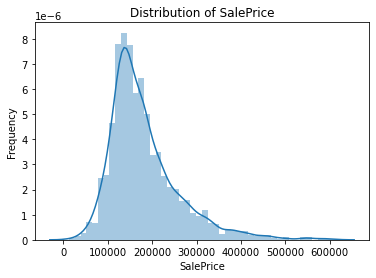

In [11]:
# Plotting a histogram of SalePrice
sns.distplot(df_train['SalePrice']).set_title('Distribution of SalePrice')
plt.ylabel('Frequency');

What we can derive from the statistical summary and distribution plot of `SalePrice`:
- `SalePrice` tends towards a normal distribution
- Visibly **right-skewed**
- Mean is higher than the median which also indicates **right skewness**

`df_test` dataset:

In [12]:
# First 5 rows in df_test
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [13]:
# Statistical summary of df_test
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Data Visualization

Data handling is a crucial step as it determines the features we use as inputs in our models which directly impacts the accuracy of our predicted `SalePrices`. <br>

Steps taken:
- Visualizing the strength of correlation between target and predictior variables using tools such as `sns.heatmap()` and several plots could help us decide on the features to drop/keep 
- Dealing with inconsistent labellings of values
- Dealing with outliers
- Dealing with null values
 > 1) Dropping unnecessary or incomplete data <br>
 > 2) Imputation of missing values

#### Heatmap for a quick scan of correlations

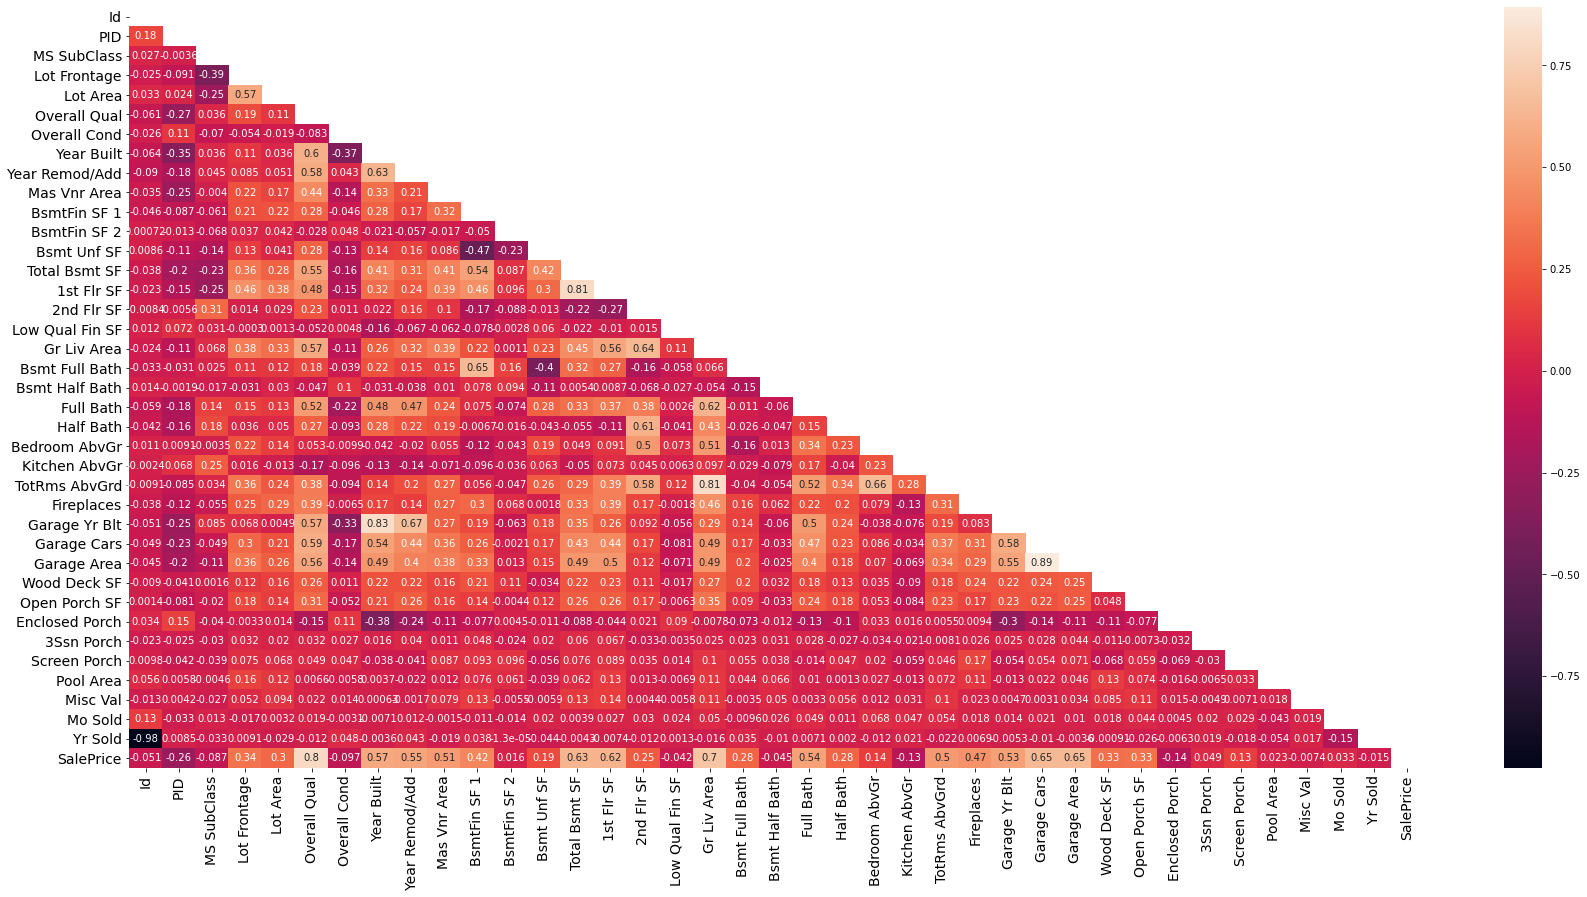

In [14]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(29,14))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns to resize the labels.
ax = sns.heatmap(df_train.corr(), mask=mask, ax=ax, annot = True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

#### Scatterplots of SalePrice against numerical features

In [23]:
# Separating numerical features into another dateframe
numerical_df_train = df_train[[col for col in df_train.columns if df_train[col].dtypes != 'object']]
numerical_df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

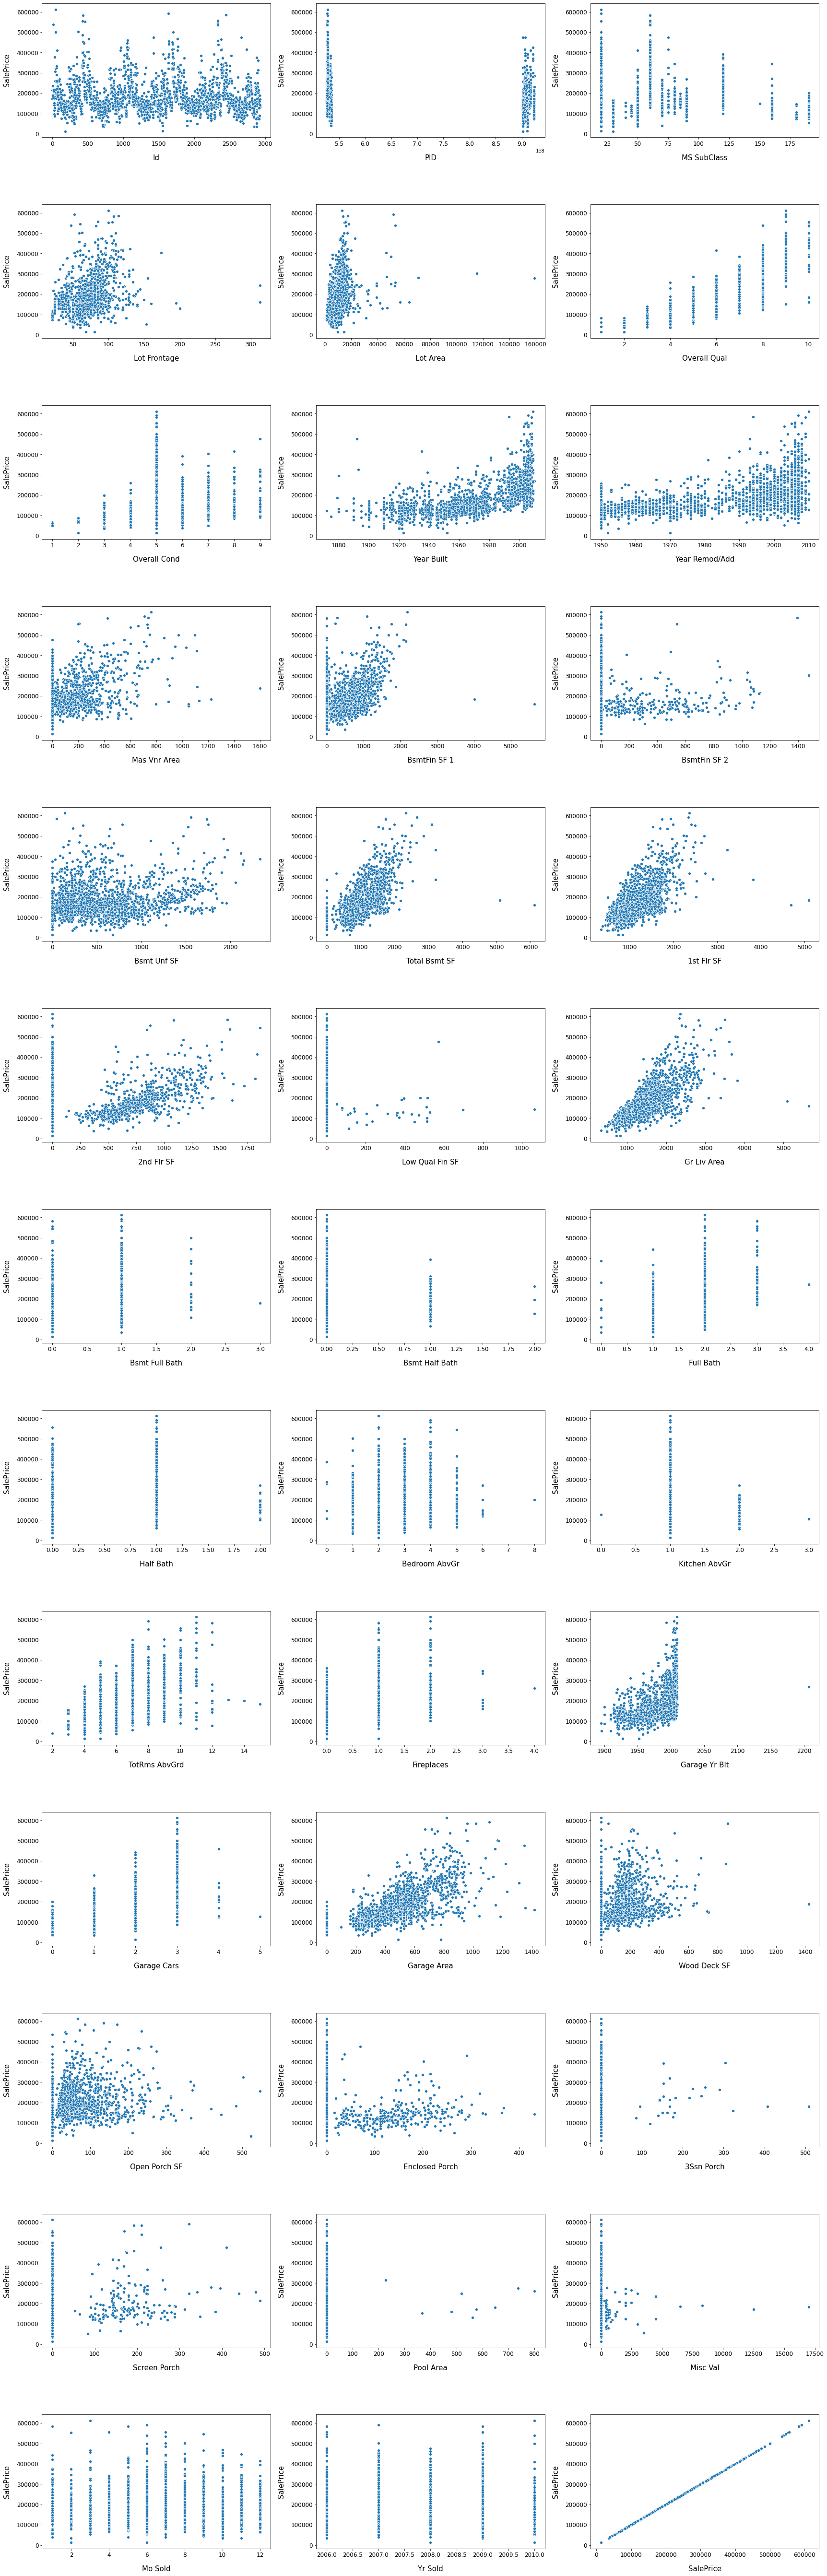

In [24]:
# Scatter subplots of numerical features against SalePrice
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
plt.subplots_adjust(hspace = 0.5)
for i, feature in enumerate(list(numerical_df_train.columns), 1):
    plt.subplot(len(list(numerical_df_train.columns)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel(f'{feature}', size=15,labelpad=15)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

#### Boxplots of SalePrice against categorical features

Heatmap and scatterplots are more suited for numeric data whereas features of an `object` datatype should be viewed as boxplots for an easier comparison of variables within this datatype. 

In [25]:
categorical_df_train = df_train[[col for col in df_train if df_train[col].dtypes == 'object']]
categorical_df_train.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

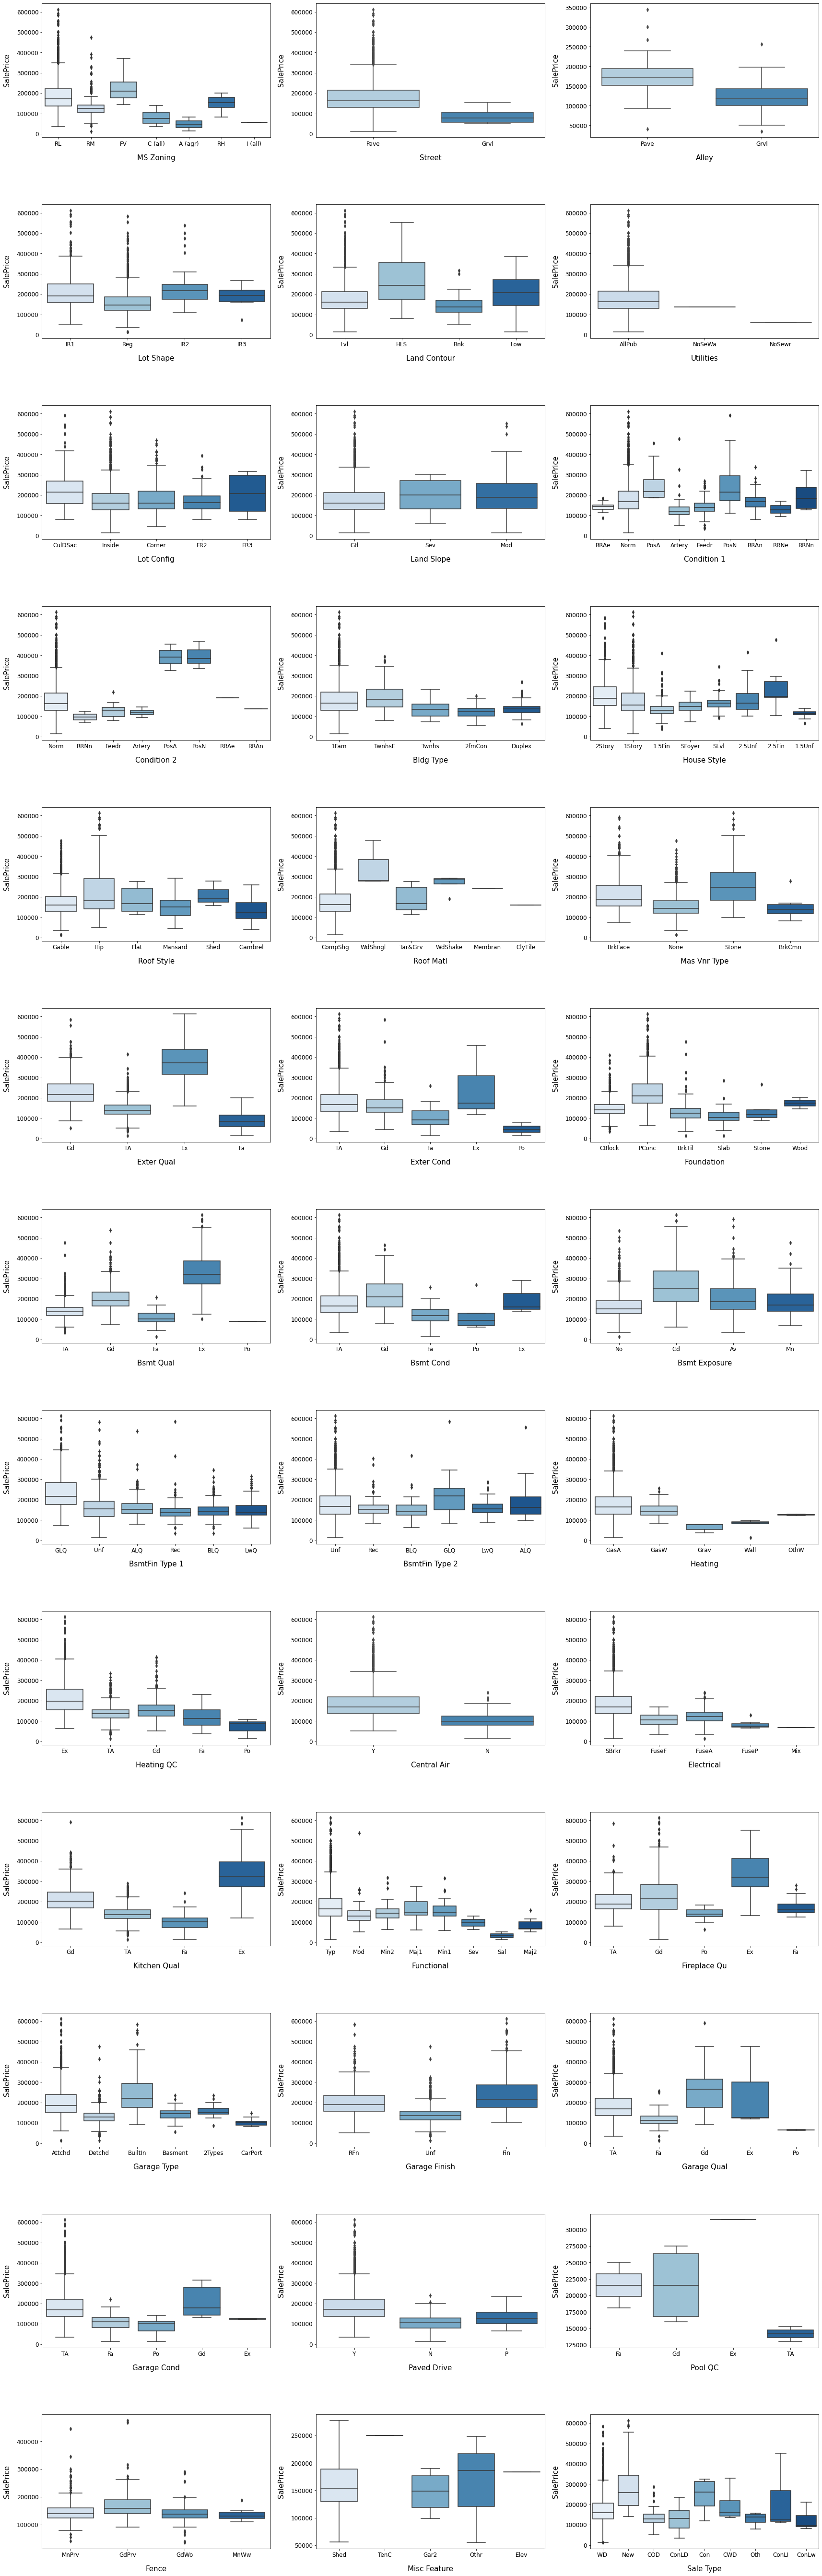

In [26]:
# plotting boxplots of categorical features except Neighborhood, Exterior 1st and Exterior 2nd
cat_features = categorical_df_train[[col for col in categorical_df_train if (col != 'Neighborhood') and (col != 'Exterior 1st') and (col != 'Exterior 2nd')]]
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
plt.subplots_adjust(hspace = 0.5)
for i, feature in enumerate(list(cat_features.columns), 1):
    plt.subplot(len(list(cat_features.columns)), 3, i)
    sns.boxplot(x=feature, y='SalePrice', palette='Blues', data=df_train)
        
    plt.xlabel(f'{feature}', size=15,labelpad=15)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

Renaming values in specific features for consistency and ease of comparison (`Exterior 2nd` and `Exterior 1st`)

In [27]:
# Looking at unique values in Exterior 2nd
df_train['Exterior 2nd'].unique()

array(['Plywood', 'VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'AsbShng',
       'CemntBd', 'Wd Shng', 'BrkFace', 'Stucco', 'BrkComm', 'ImStucc',
       'Stone', 'CBlock', 'AsphShn'], dtype=object)

In [28]:
# Looking at unique values in Exterior 1st
df_train['Exterior 1st'].unique()

array(['HdBoard', 'VinylSd', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd',
       'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone',
       'CBlock', 'ImStucc', 'AsphShn'], dtype=object)

In [29]:
# Renaming classes for consistency across the 2 variables:
df_train['Exterior 2nd'].replace('CmentBd','CemntBd',inplace = True)
df_train['Exterior 2nd'].replace('Brk Cmn','BrkComm',inplace = True)

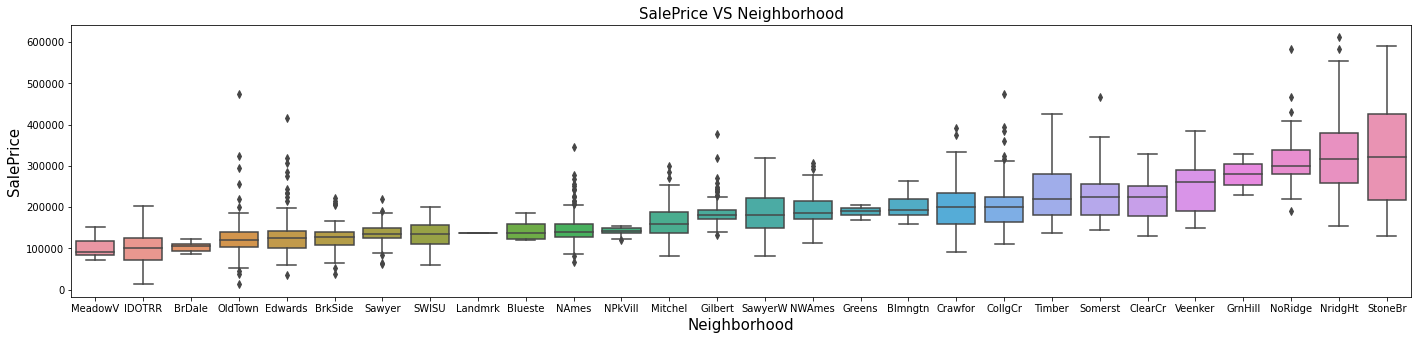

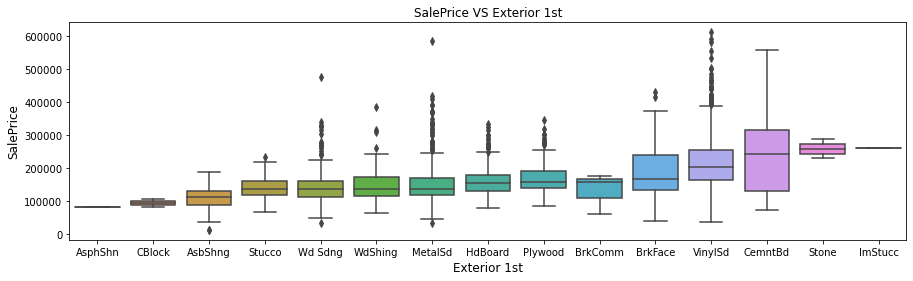

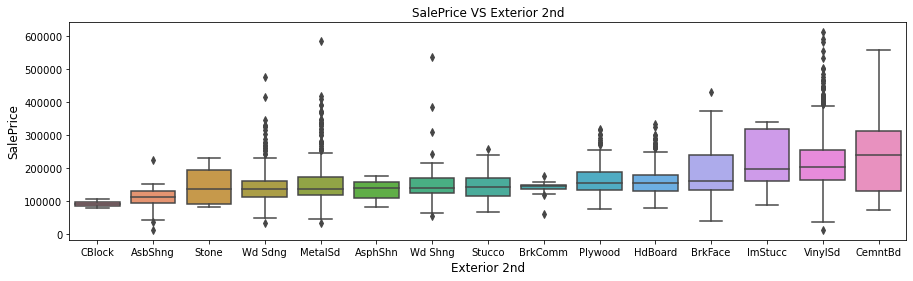

In [30]:
# Resizing the graphs for the 3 features with many classes, grouping them and sorting them according to their median SalePrice

# For Neighborhood:
grouped_neighbourhood = df_train.groupby('Neighborhood').median().sort_values(by = 'SalePrice')
# Setting size of graph
plt.figure(figsize = (24,5))
# Plotting SalePrice vs Neighborhood which is sorted according to their SalePrice
sns.boxplot(x = 'Neighborhood', y= 'SalePrice', data = df_train, order = grouped_neighbourhood.index)
# Labelling title
plt.title('SalePrice VS Neighborhood', fontsize = 15)
# Labeling x-axis
plt.xlabel('Neighborhood', fontsize = 15)
# Labeling y-axis
plt.ylabel('SalePrice',fontsize = 15)

# For Exterior 1st: 
grouped_ext_1st = df_train.groupby('Exterior 1st').median().sort_values(by = 'SalePrice')
# Setting size of graph
plt.figure(figsize = (15,4))
# Plotting SalePrice vs Exterior 1st which is sorted according to their SalePrice
sns.boxplot(x = 'Exterior 1st', y = 'SalePrice', data = df_train, order = grouped_ext_1st.index)
# Labelling title
plt.title('SalePrice VS Exterior 1st')
# Labeling x-axis
plt.xlabel('Exterior 1st', fontsize = 12)
# Labeling y-axis
plt.ylabel('SalePrice',fontsize = 12)

# For Exterior 2nd: 
grouped_ext_2nd = df_train.groupby('Exterior 2nd').median().sort_values(by = 'SalePrice')
# Setting size of graph
plt.figure(figsize = (15,4))
# Plotting SalePrice vs Exterior 2nd which is sorted according to their SalePrice
sns.boxplot(x = 'Exterior 2nd', y = 'SalePrice', data = df_train, order = grouped_ext_2nd.index)
# Labelling title
plt.title('SalePrice VS Exterior 2nd');
# Labeling x-axis
plt.xlabel('Exterior 2nd', fontsize = 12)
# Labeling y-axis
plt.ylabel('SalePrice',fontsize = 12);

### Takeaways from Exploring Data <br>

1) `SalePrice` shares a large correlation coefficient with these numerical features:
> `Overall Qual`: 0.8 <br>
> `GR Liv Area`: 0.7 <br>
> `Garage Cars`: 0.65 <br>
> `Garage Area`: 0.65 <br>
> `Total Bsmt SF`: 0.63 <br>
> `1st Flr SF` : 0.62 <br>
> `Year Built`: 0.57 <br>
> `Year Remod/Add`: 0.55 <br>
> `Garage Yr Blt`: 0.53 <br>
> `Mas Vnr Area`: 0.51 <br>

2) `Overall Qual` and `Overall Cond` are surprisingly weakly correlated <br>
3) Many categorical features show correlations between varying classes and `SalePrice` thus encoding should be done

## Cleaning data

#### Dropping columns with large amount of missing data: <br>

For variables with large proportion of missing data, there is limited inference that can be drawn regarding their correlation with `SalePrice`. Therefore, it would be viable to drop columns with a proportion of missing data that exceeds a threshold which is set at **80%.**

Displaying columns with null values in `df_train`

In [31]:
# Displaying columns that have null values
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [32]:
# Displaying percentages of null values in their respective columns:
percent_of_null_rows = {}
for col in null_columns:
    percent_of_null_rows[col] = (df_train[col].isnull().sum()/len(df_train))
    
# Sorting the dictionary according to their percentage of null values
sorted_percent_of_null_rows = sorted(percent_of_null_rows.items(), key=lambda x: x[1], reverse=True)

# List of top 10 features with the most missing values:
sorted_percent_of_null_rows[:10]

[('Pool QC', 0.9956118966357874),
 ('Misc Feature', 0.9683081423695759),
 ('Alley', 0.931740614334471),
 ('Fence', 0.8049731838127743),
 ('Fireplace Qu', 0.48756704046806437),
 ('Lot Frontage', 0.16089712335446124),
 ('Garage Yr Blt', 0.05558264261335934),
 ('Garage Finish', 0.05558264261335934),
 ('Garage Qual', 0.05558264261335934),
 ('Garage Cond', 0.05558264261335934)]

In [33]:
# Displaying columns with null values that exceeds threshold
threshold = 0.8
columns_to_remove = [col for col,percent in percent_of_null_rows.items() if percent >= threshold]
columns_to_remove

['Alley', 'Pool QC', 'Fence', 'Misc Feature']

In [34]:
# Dropping columns in df_train
df_train.drop(columns = columns_to_remove,inplace = True)

In [35]:
# Dropping columns in df_test
df_test.drop(columns = columns_to_remove,inplace = True)

#### Dropping redundant columns:

In [36]:
# Sum of each unique value in Utilities
df_train['Utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

Based on the **SalePrice vs Utilities** boxplot shown [above](#Boxplots-of-SalePrice-against-categorical-features) and the number of unique values in `Utilities`, most of the rows have the same value and therefore would not be helpful in training our model

In [37]:
# dropping Utilities column
df_train.drop(columns = ['Utilities'],inplace = True)
df_test.drop(columns = ['Utilities'], inplace = True)

Since the features included as inputs into our the model should be consistent regardless of the dataset, the columns that remain in `df_train` and `df_test` should be identical.

#### Dropping rows with missing values:

Most of the columns contain <6% of rows with missing values and these rows would be dropped as it is an easier way to deal with a small number of missing values.

In [38]:
# Displayings rows that fall below the 6% threshold
rows_to_remove = [col for col,percent in percent_of_null_rows.items() if percent < 0.06]
rows_to_remove

['Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [39]:
# Dropping rows 
df_train.dropna(subset = rows_to_remove, inplace = True)

In [40]:
# Remaining columns with null values in df_train
remaining_null_columns=df_train.columns[df_train.isnull().any()]
df_train[remaining_null_columns].isnull().sum()

Lot Frontage    310
Fireplace Qu    851
dtype: int64

## Feature Engineering
Feature engineering is important in preparing our input data so that it fulfills the requirements of our model and improve its performance, generating predictions that are the closest to our actual data

#### Choosing appropriate feature engineering techniques:
The remaining columns with a considerable number of missing values are imputed to retain important information in this large number of rows which would be important in aiding our model to generate accurate predictions

1.`Fireplace Qu`: Imputation

In [41]:
# Displaying all unique values of Fireplace qu
df_train['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

Analyzing its correlation with `SalePrice`could give us insights on implementing imputation

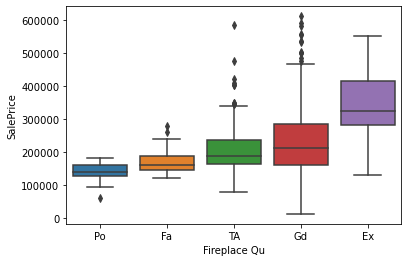

In [42]:
sns.boxplot(data = df_train, x = 'Fireplace Qu', y = 'SalePrice',  order = ['Po','Fa','TA','Gd','Ex'])

In [43]:
# Renaming 'TA' as 'Ta' for consistency:
df_train['Fireplace Qu'].replace('TA','Ta',inplace = True)
df_test['Fireplace Qu'].replace('TA','Ta',inplace = True)

Given that there is a positive correlation with the `SalePrice` and `Fireplace Qu`, there might be insights that we can derive from the null values and therefore should not be dropped but added as a class instead.

In [44]:
# train set: Using categorical imputation 
df_train['Fireplace Qu'].replace(np.nan, 'Na',inplace = True)

# test set: Using categorical imputation 
df_test['Fireplace Qu'].replace(np.nan, 'Na',inplace = True)

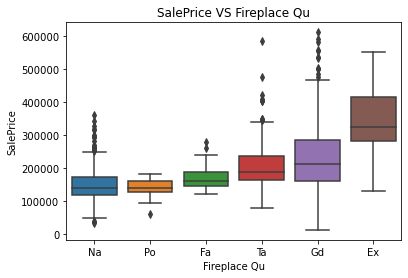

In [45]:
# Boxplot to visualize the relationship between SalePrice and Fireplace Qu with the new Na class
sns.boxplot(x = 'Fireplace Qu', y = 'SalePrice', data = df_train, order = ['Na','Po','Fa','Ta','Gd','Ex']).set_title('SalePrice VS Fireplace Qu');

2.`Lot Frontage`: Removing outliers and imputation

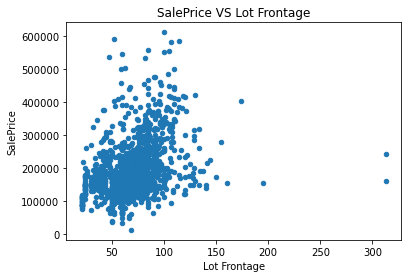

In [46]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Lot Frontage')
plt.title('SalePrice VS Lot Frontage');

Based on the heatmap [above](#Heatmap-for-a-quick-scan-of-correlations), there is a **positive** correlation between `SalePrice` and `Lot Frontage`, with a coefficient of 0.34 and 2 outliers with `Lot Frontage` values that exceed 300.

In [47]:
# Removing the two outliers
outliers = df_train[df_train['Lot Frontage'] > 300].index
df_train.drop(outliers,inplace = True)

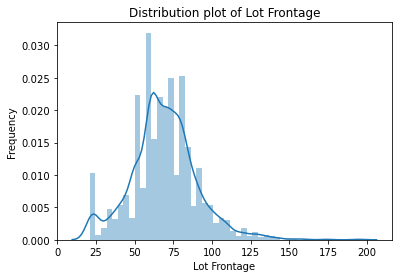

In [48]:
# Plotting frequency against Lot Frontage for each dataset
sns.distplot(df_train['Lot Frontage']).set_title('Distribution plot of Lot Frontage')
plt.ylabel('Frequency');

Numerical Imputation would be done using the median `Lot Frontage` value since it has a distribution that tends more towards a normal distribution and is less right skewed as compared to the dataset with the outliers. 

In [49]:
# Substituting all null values with median Lot Frontage values in both df_train and df_test
df_train['Lot Frontage'].fillna(df_train['Lot Frontage'].median(), inplace=True)
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].median(), inplace=True)

#### Dealing with outliers in highly correlated features:

#### 1.`Overall Qual`

`SalePrice` has a strong positive correlation with `Overall Qual` as seen as in the [heatmap](#Heatmap-for-a-quick-scan-of-correlations) above therefore would be a strong predictor of our output

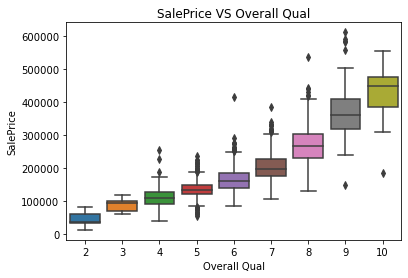

In [50]:
# Boxplots of SalePrice VS Overall Qual
sns.boxplot(x = df_train['Overall Qual'], y = df_train['SalePrice']).set_title('SalePrice VS Overall Qual');

This is further verified by the boxplot displayed which shows a general increase `SalePrice` as `Overall Qual` of the house increases and thus would be an important feature to include in our model

#### 2. `Gr Liv Area`

Based on the [heatmap](#Heatmap-for-a-quick-scan-of-correlations),`SalePrice` has a strong positive correlation with `Gr Liv Area` which can be better visualized in the graph below 

Gradient of best fit line: 116.995


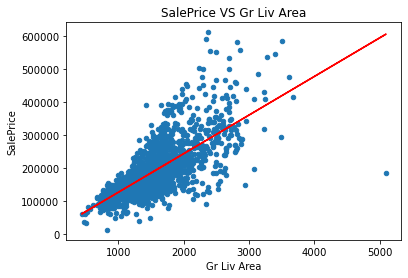

In [51]:
# Zooming in on the scatterplot of SalePrice and Gr Liv Area
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Gr Liv Area')
plt.title('SalePrice VS Gr Liv Area')

#ploting the best fit line:
m,b = np.polyfit(df_train['Gr Liv Area'],df_train['SalePrice'],1)
plt.plot(df_train['Gr Liv Area'],m*df_train['Gr Liv Area'] + b, c = 'r');
print(f'Gradient of best fit line: {round(m,3)}')

Since `Gr Liv Area` has a strong correlation with `SalePrice`, dropping the outlier would improve this correlation and therefore improving the model performance

In [52]:
# Removing outlier with Gr Liv Area that exceeds 5000
outlier = df_train[df_train['Gr Liv Area'] > 5000].index
df_train.drop(outlier,inplace = True)

Correlation coefficient: 0.7332160524998411
Gradient of best fit line: 120.537


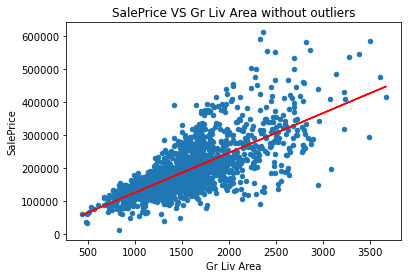

In [53]:
# Zooming in on the scatterplot of SalePrice and Gr Liv Area
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Gr Liv Area')
plt.title('SalePrice VS Gr Liv Area without outliers')

#ploting the best fit line:
m,b = np.polyfit(df_train['Gr Liv Area'],df_train['SalePrice'],1)
plt.plot(df_train['Gr Liv Area'],m*df_train['Gr Liv Area'] + b, c = 'r');
print(f'Correlation coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Gr Liv Area"])[0][1]}')
print(f'Gradient of best fit line: {round(m,3)}')

#### 3. `Garage Cars`

Coefficient correlation: 0.6542107006266233


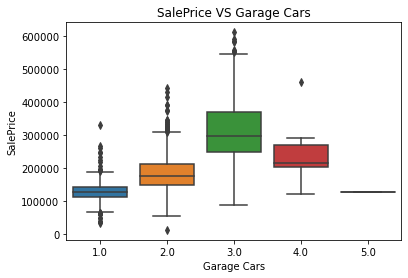

In [54]:
# Boxplot of SalePrice vs Garage Cars
sns.boxplot(x = df_train['Garage Cars'],y = df_train['SalePrice'])
plt.title('SalePrice VS Garage Cars');
print(f'Coefficient correlation: {np.corrcoef(df_train["SalePrice"],df_train["Garage Cars"])[0][1]}')

In [55]:
# Number of rows within each Garage Cars class
df_train['Garage Cars'].value_counts().sort_index()

1.0     507
2.0    1088
3.0     255
4.0      12
5.0       1
Name: Garage Cars, dtype: int64

The boxplot has shown an interesting correlation between having 3 garage cars and a higher median and wider range of `SalePrice` as compared to other classes of `Garage Cars`. 

#### 4. `Garage Area`

Coefficient correlation: 0.6534346064934448
Gradient of best fit line: 274.657


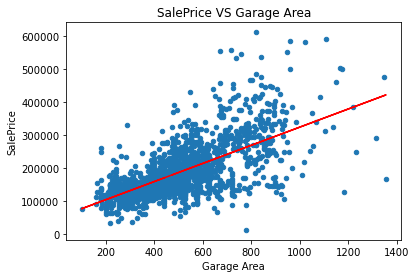

In [56]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Garage Area')
plt.title('SalePrice VS Garage Area')

#plotting the best fit line:
m,b = np.polyfit(df_train['Garage Area'],df_train['SalePrice'],1)
plt.plot(df_train['Garage Area'],m*df_train['Garage Area'] + b, c = 'r')

print(f'Coefficient correlation: {np.corrcoef(df_train["SalePrice"],df_train["Garage Area"])[0][1]}')
print(f'Gradient of best fit line: {round(m,3)}')

Coefficient correlation: 0.8544444722264221


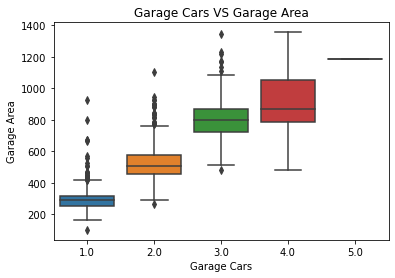

In [57]:
# Visualizing the correlation between Garage Cars and Garage Area 
sns.boxplot(x = df_train['Garage Cars'],y = df_train['Garage Area'])
plt.title('Garage Cars VS Garage Area');
print(f'Coefficient correlation: {np.corrcoef(df_train["Garage Cars"],df_train["Garage Area"])[0][1]}')

Even though the respective correlation with `SalePrice` was fairly weak, these 2 features seem to be highly correlated and thus an interaction term could improve the performance of our model

#### Creating an interaction term with `Garage Cars` and `Garage Area`:

In [58]:
# A new feature which combines Garage Cars and Garage Area
df_train['car_area'] = df_train['Garage Cars']*df_train['Garage Area']

Coefficient correlation: 0.6820586500511444
Gradient of best fit line: 74.801


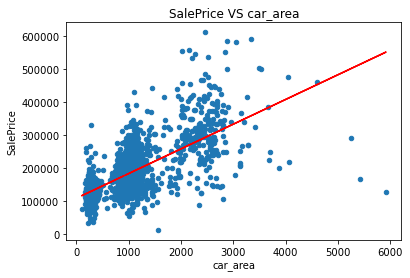

In [59]:
# Removing outliers and plotting graph of SalePrice VS Garage Area
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'car_area')
plt.title('SalePrice VS car_area')

#plotting the best fit line:
m,b = np.polyfit(df_train['car_area'],df_train['SalePrice'],1)
plt.plot(df_train['car_area'],m*df_train['car_area'] + b, c = 'r')

print(f'Coefficient correlation: {np.corrcoef(df_train["SalePrice"],df_train["car_area"])[0][1]}')
print(f'Gradient of best fit line: {round(m,3)}')

In [60]:
# Coefficient correlation of SalePrice and Garage Area with outliers
print(f'Coefficient correlation: {np.corrcoef(df_train["SalePrice"],df_train["car_area"])[0][1]}')

Coefficient correlation: 0.6820586500511444


The correlation of this interaction term with the `SalePrice` is stronger than the corresponding correlations for each of the feature and therefore could be more useful in predicing the output. Since there are 3 outliers with `SalePrice` values that could be skew the correlation coefficient drastically, they should be removed.

In [61]:
# Dropping the outliers that are seen in the SalePrice VS car_area graph above
outliers = df_train[df_train['car_area'] > 5000].index
df_train.drop(outliers,inplace = True)

Coefficient correlation: 0.7045455805084422
Gradient of best fit line: 79.784


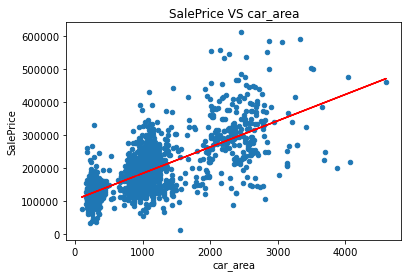

In [62]:
# Removing outliers and plotting graph of SalePrice VS Garage Area
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'car_area')
plt.title('SalePrice VS car_area')

#plotting the best fit line:
m,b = np.polyfit(df_train['car_area'],df_train['SalePrice'],1)
plt.plot(df_train['car_area'],m*df_train['car_area'] + b, c = 'r')

print(f'Coefficient correlation: {np.corrcoef(df_train["SalePrice"],df_train["car_area"])[0][1]}')
print(f'Gradient of best fit line: {round(m,3)}')

As expected, the correlation coefficient has improved to 0.7 and every 1 unit change in this new variable has a greater influence on the `SalePrice`.

In [63]:
# removing original columns which shows poorer correlation 
df_train.drop(columns = ['Garage Cars','Garage Area'],inplace = True)

In [64]:
# Creating a new interaction term in df_test so that it meets the requirements of the model
df_test['car_area'] = df_test['Garage Cars'] * df_test['Garage Area']

In [65]:
# Removing original columns from df_test
df_test.drop(columns = ['Garage Cars','Garage Area'],axis = 1, inplace = True)

#### 5.`Total Bsmt DF`

Gradient of best fit line: 135.067
Correlation Coefficient: 0.6714606242413084


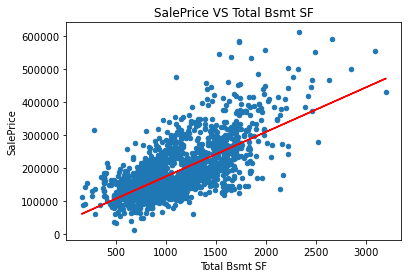

In [66]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Total Bsmt SF')
plt.title('SalePrice VS Total Bsmt SF')

m,b = np.polyfit(df_train['Total Bsmt SF'],df_train['SalePrice'],1)
plt.plot(df_train['Total Bsmt SF'],m*df_train['Total Bsmt SF'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Total Bsmt SF"])[0][1]}')

#### 6. `1st Flr SF`

Gradient of best fit line: 138.892
Correlation Coefficient: 0.660584993355786


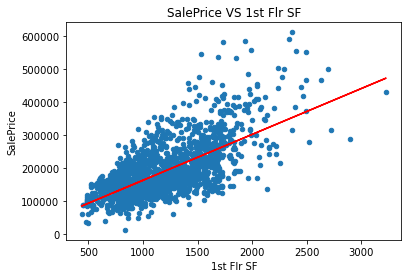

In [67]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = '1st Flr SF')
plt.title('SalePrice VS 1st Flr SF')

m,b = np.polyfit(df_train['1st Flr SF'],df_train['SalePrice'],1)
plt.plot(df_train['1st Flr SF'],m*df_train['1st Flr SF'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["1st Flr SF"])[0][1]}')

#### 7. `Mas Vnr Area`

Gradient of best fit line: 228.009
Correlation Coefficient: 0.5130093997253786


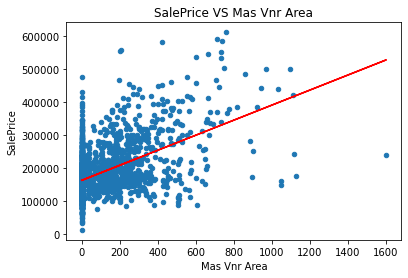

In [68]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Mas Vnr Area')
plt.title('SalePrice VS Mas Vnr Area')

m,b = np.polyfit(df_train['Mas Vnr Area'],df_train['SalePrice'],1)
plt.plot(df_train['Mas Vnr Area'],m*df_train['Mas Vnr Area'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Mas Vnr Area"])[0][1]}')

There is an outlier that can has a `Mas Vnr Area` value of > 1500 which might skew our model and thus should be removed since it has a positive correlation with `SalePrice`

In [69]:
# Removing the row with an extreme Mas Vnr Area 
outlier = df_train[df_train['Mas Vnr Area'] > 1500].index
df_train.drop(outlier,inplace = True)

Gradient of best fit line: 235.702
Correlation Coefficient: 0.5201261802731202


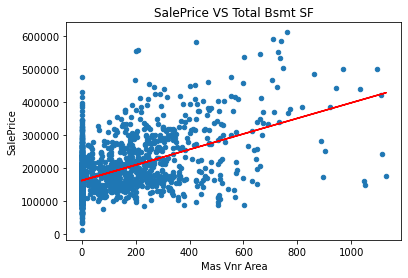

In [70]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Mas Vnr Area')
plt.title('SalePrice VS Total Bsmt SF')

m,b = np.polyfit(df_train['Mas Vnr Area'],df_train['SalePrice'],1)
plt.plot(df_train['Mas Vnr Area'],m*df_train['Mas Vnr Area'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Mas Vnr Area"])[0][1]}')

As expected, the correlation coefficient has improved to 0.52 and every 1 unit change in this new variable has a greater influence on the `SalePrice`.

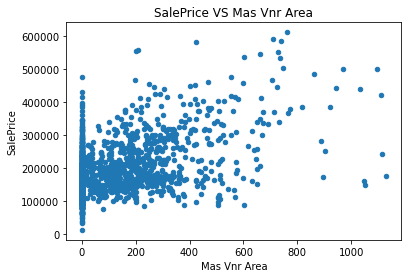

In [71]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Mas Vnr Area')
plt.title('SalePrice VS Mas Vnr Area');

There is an outlier that can has a `Mas Vnr Area` value of > 1500 which might skew our model and thus should be removed since Mas Vnr Area has a positive correlation with `SalePrice`

In [72]:
# Removing the row with an extreme Mas Vnr Area 
outlier = df_train[df_train['Mas Vnr Area'] > 1500].index
df_train.drop(outlier,inplace = True)

#### 8. `Lot Area`

Gradient of best fit line: 3.616
Correlation Coefficient: 0.3060867721001311


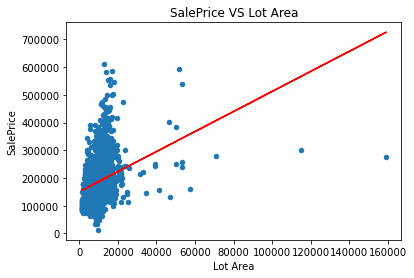

In [73]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Lot Area')
plt.title('SalePrice VS Lot Area')

m,b = np.polyfit(df_train['Lot Area'],df_train['SalePrice'],1)
plt.plot(df_train['Lot Area'],m*df_train['Lot Area'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Lot Area"])[0][1]}')

In [74]:
# Finding and removing outliers
outlier = df_train[df_train['Lot Area'] > 100000]
df_train.drop(outlier.index,inplace = True)

Gradient of best fit line: 5.537
Correlation Coefficient: 0.36254402777222833


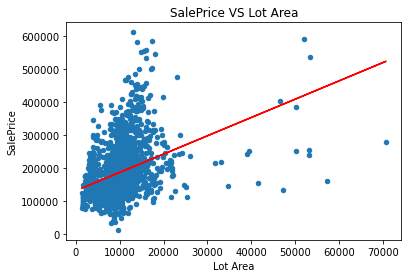

In [75]:
df_train.plot(kind = 'scatter',y = 'SalePrice', x = 'Lot Area')
plt.title('SalePrice VS Lot Area')

m,b = np.polyfit(df_train['Lot Area'],df_train['SalePrice'],1)
plt.plot(df_train['Lot Area'],m*df_train['Lot Area'] + b, c = 'r')
print(f'Gradient of best fit line: {round(m,3)}')
print(f'Correlation Coefficient: {np.corrcoef(df_train["SalePrice"],df_train["Lot Area"])[0][1]}')

The removal of outliers has increased correlation coefficient from 0.31 to 0.36 and thus would help to better improve the accuracy of our predictions

#### Imputation in the `df_test` dataset:

In [76]:
# remaining missing Values in test data:
null_columns=df_test.columns[df_test.isnull().any()]
df_test[null_columns].isnull().sum()

Mas Vnr Type       1
Mas Vnr Area       1
Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin Type 2    25
Electrical         1
Garage Type       44
Garage Yr Blt     45
Garage Finish     45
Garage Qual       45
Garage Cond       45
dtype: int64

For the missing values in `df_test`, numerical and categorical imputation would be done on the respective columns

In [77]:
# Replacing null values in numerical features with medians and mode for categorial features
for col in null_columns:
    if df_test[col].dtypes == 'object':
        df_test[col].fillna(df_test[col].mode()[0],inplace = True)
    else:
        df_test[col].fillna(df_test[col].median(),inplace = True)

In [78]:
# Checking for any remaining null values
null_columns=df_test.columns[df_test.isnull().any()]
df_test[null_columns].dtypes

Series([], dtype: object)

###  One hot encoding on categorical variables <br>
Since machine learning models are unable to interpret categorical data, one hot encoding would convert the classes into numerical values so that categorical features could train the model in generating better predictions. Since `df_train` and `df_test` could different classes, they would be merged into a new dataset, `entire_df` so as to encode every possible class

In [79]:
# Saving all categorical variables as categorical
categorical = df_train.select_dtypes(include=['object'])

In [80]:
# Adding a SalePrice column to df_test for consistency when merging test and train set together
df_test['SalePrice'] = np.nan

**Merging `df_train` and `df_test` into `entire_df`**

In [81]:
# Merging all the values in cleaned df_train and df_test
entire_df = pd.concat((df_train,df_test)).reset_index(drop = True)

In [82]:
# Selecting all categorical features in entire_df to encode
entire_df_categorical = entire_df.select_dtypes(include=['object'])

**Using One Hot Encoding on all categorical features**

In [83]:
# One hot encoding on entire_df
entire_df = pd.get_dummies(entire_df, columns = [col for col in entire_df_categorical.columns])

In [84]:
# Saving entire_df as a new csv file
entire_df.to_csv('../datasets/entire_df.csv', index=False)

### Renaming Columns<br>

Renaming columns so that they are consistent with the guidelines as shown <br>

Guidelines: <br>
- Column names should be all lowercase
- Column names should not contain spaces
- Column names should be unique and informative 


In [85]:
# Renaming all columns in entire_df
entire_df.columns = [col.replace(' ','_').strip().lower() for col in entire_df.columns]

In [86]:
# Changing all columns in df_train and df_test
df_train.columns = [col.replace(' ','_').strip().lower() for col in df_train.columns]
df_test.columns = [col.replace(' ','_').strip().lower() for col in df_test.columns]

#### Data Dictionary for `entire_df`: <br>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|int|entire_df|Id number| 
|pid|int|entire_df|Parcel identification number| 
|ms_subclass|onject|entire_df| Type of dwelling | 
|ms_zoning |object|entire_df|general zoning classification of the sale| 
|lot_frontage|float|entire_df|Linear feet of street connected to property|
|lot_area|int|entire_df|Lot size in square feet|
|street|object|entire_df|Type of road access to property| 
|lot_shape|object|entire_df|Type of alley access to property|
|land_contour|object|entire_df|Flatness of the property| 
|lot_config|object|entire_df|Lot configuration| 
|land_slope|object|entire_df|Slope of property|
|neighborhood|object|entire_df|Physical locations within Ames city limits| 
|condition_1|object|entire_df|Proximity to various conditions| 
|condition_2|object|entire_df|Proximity to various conditions| 
|bldg_type|object|entire_df|Type of dwelling| 
|house_style|object|entire_df|Style of dwelling| 
|overall_qual|int|entire_df|Rates the overall material and finish of the house|  
|overall_cond|int|entire_df|Rates the overall condition of the house |
|year_built|int|entire_df|Original construction date|  
|year_remod/add|int|entire_df|Remodel date | 
|roof_style|object|entire_df|Type of roof| 
|roof_matl|object|entire_df|Roof material| 
|exterior_1st|object|entire_df|Exterior covering on house| 
|exterior_2nd|object|entire_df|Exterior covering on house (if more than one material)| 
|mas_vnr_type|object|entire_df|Masonry veneer type|
|mas_vnr_area|float|entire_df|Masonry veneer area in square feet|
|exter_qual|object|entire_df|Evaluates the quality of the material on the exterior| 
|exter_cond|object|entire_df|Evaluates the present condition of the material on the exterior| 
|foundation|object|entire_df|Type of foundation| 
|bsmt_qual|object|entire_df|Evaluates the height of the basement|
|bsmt_cond|object|entire_df|Evaluates the general condition of the basement |
|bsmt_exposure|object|entire_df|Refers to walkout or garden level walls| 
|bsmtfin_type_1|object|entire_df|Rating of basement finished area| 
|bsmtfin_sf_1|float|entire_df|Type 1 finished square feet|
|bsmtfin_type_2|object|entire_df|Rating of basement finished area| 
|bsmtfin_sf_2|float|entire_df|Type 2 finished square feet|
|bsmt_unf_sf|float|entire_df|Unfinished square feet of basement area|
|total_bsmt_sf|float|entire_df|Total square feet of basement area|
|heating|object|entire_df|Type of heating |
|heating_qc|object|entire_df|Heating quality and condition |
|central_air|object|entire_df|Central air conditioning| 
|electrical|object|entire_df|Electrical system| 
|1st_flr_sf|int|entire_df|First Floor square feet|  
|2nd_flr_sf|int|entire_df|Second floor square feet|  
|low_qual_fin_sf|int|entire_df|Low quality finished square feet|  
|gr_liv_area|int|entire_df|Above grade (ground)living area square feet| 
|bsmt_full_bath|float|entire_df|Basement full bathrooms|
|bsmt_half_bath|float|entire_df|Basement half bathrooms|
|full_bath|int|entire_df|Full bathrooms above grade|
|half_bath|int|entire_df|Half baths above grade | 
|bedroom_abvgr|int|entire_df|Bedrooms above grade|  
|kitchen_abvgr|int|entire_df|Kitchens above grade|  
|kitchen_qual|object|entire_df|Kitchen quality |
|totrms_abvgrd|int|entire_df|Total rooms above grade | 
|functional|object|entire_df|Home functionality |
|fireplaces|int|entire_df|Number of fireplaces | 
|fireplace_qu|object|entire_df|Fireplace quality |
|garage_type|object|entire_df|Garage location |
|garage_yr_blt|float|entire_df|Year garage was built|
|garage_finish|object|entire_df|Interior finish of the garage| 
|garage_qual|object|entire_df|Garage quality |
|garage_cond|object|entire_df|Garage condition |
|paved_drive|object|entire_df|Paved driveway| 
|wood_deck_sf|int|entire_df|Wood deck area in square feet|  
|open_porch_sf|int|entire_df|Open porch area in square feet|  
|enclosed_porch|int|entire_df| Enclosed porch area in square feet| 
|3ssn_porch|int|entire_df|Three season porch area in square feet|
|screen_porch|int|entire_df|Screen porch area in square feet| 
|pool_area|int|entire_df|Pool area in square feet| 
|misc_val|int|entire_df|Miscellaneous feature not covered in other categories|  
|mo_sold|int|entire_df|Month Sold (MM)|
|yr_sold|int|entire_df|Year Sold (YYYY)|
|sale_type|object|entire_df|Type of sale| 
|saleprice|int|entire_df|Sale price|
|car_area|float|entire_df|Interaction term of Garage Car and Garage Area|


## Model Preparation 
After encoding all of the categorical variables, data should be split into different datasets, `final_df_train` and `final_df_test` respecitively before training the model. This allows for the generalization of model to unseen datasets.

In [87]:
# Getting the indexes of rows that belong to df_train
df_train_indexes = df_train.shape[0]

In [88]:
# Splitting back into the train and test set after dummies are made
final_df_train = entire_df[:df_train_indexes]
final_df_test = entire_df[df_train_indexes:]

In [89]:
# Checking for the same number of rows as df_train
print(f'Rows in df_train: {df_train.shape[0]}')
print(f'Rows in final_df_train: {final_df_train.shape[0]}')

Rows in df_train: 1857
Rows in final_df_train: 1857


In [90]:
# Checking for the same number of rows as df_test
print(f'Rows in df_test: {df_test.shape[0]}')
print(f'Rows in final_df_test: {final_df_test.shape[0]}')

Rows in df_test: 879
Rows in final_df_test: 879


In [91]:
# The SalePrice column of final_df_test should be dropped
final_df_test.drop(columns = ['saleprice'],inplace = True)

D:\downloads\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Creating our `X` predictior variables and `y` target variable

In [92]:
# including all features 
X_id = final_df_train[[col for col in final_df_train if col != 'saleprice']]
y = final_df_train['saleprice']

### Model Preparation - Train/test split

Use the `train_test_split` function to split `X` and `y` datasets into `train` and `test` set. Splitting the original data into 2 subsets allows for validation of model on unseen data.

In [93]:
# Splitting the data into 2 different groups and setting a random_state to ensure consistency in results obtained
X_train_id,X_test_id,y_train,y_test = train_test_split(X_id,y,random_state = 42)

In [94]:
# Leaving the id column out since it does not help to generate predictions
X_train = X_train_id[[col for col in X_train_id.columns if col != 'id']]
X_test = X_test_id[[col for col in X_test_id.columns if col != 'id']]

### Model Preparation - Scaling

Before using regularization methods such as `Lasso` and `Ridge`, scaling is done so that all the predictor variables share the same scale. `StandardScaler()` would be used to scale both the `train` and `test` sets

In [95]:
# Instantiate Model:
ss = StandardScaler()

# Fiting the model with X train, to calculate the parameters(mean and standard deviation)
ss.fit(X_train)

# Transforming both train and test data
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

### Model Preparation - Instantiate models

Evaluating 4 different regression models - `LinearRegression`,`LassoCV`, `RidgeCV` and `ElasticNetCV` using `cross_val_score` before selecting one of them for our final predictions

**Instantiate Models**

In [96]:
# Instantiate Models
lr = LinearRegression()

# ridge model
ridge = RidgeCV(alphas = np.logspace(0.1,10,200))

# lasso model - try to use different alphas
lasso = LassoCV(n_alphas = 200)

# enet model
enet = ElasticNetCV(l1_ratio = np.linspace(0.01,1,50), n_alphas = 200)

**Cross Validation** <br>

Cross validation is done on the training set to validate our model by detecting for data overfitting. A higher mean r2 score generated from `cross_val_score` would indicate that the model is able to generalize well to unseen data. 

In [97]:
# Calculating the mean r2 score for the Linear regression model
lr_score = cross_val_score(lr,X_train_ss,y_train,cv = 5)
lr_score.mean()

-6.689947434537531e+24

In [98]:
# Calculating the mean r2 score for ridge model
ridge_score = cross_val_score(ridge,X_train_ss,y_train,cv = 5)
ridge_score.mean()

0.905844559985929

In [99]:
# Calculating the mean r2 score for lasso model
lasso_score = cross_val_score(lasso,X_train_ss,y_train,cv = 5)
lasso_score.mean()

0.9102203843228864

In [100]:
# Calculating the mean r2 score for enet model
enet_scores = cross_val_score(enet,X_train_ss,y_train, cv = 5)
enet_scores.mean()

0.9102203843228864

### Naive/Baseline Prediction <br>
The baseline prediction refers to the prediction that is generated from the simplest model suhc as simple linear regression model and thus any other complex models deployed would have to beat this baseline score so that the use of other more sophisticated models are justified.

In [101]:
# Generating predictions with our simple linear regression model
lr.fit(X_train_ss,y_train)
lr_predictions = lr.predict(X_test_ss)

In [102]:
# Calculating the root mean square error for our predictions
lr_residuals = y_test - lr_predictions
lr_rmse = np.sqrt(mean_squared_error(y_test,lr_residuals))
print(f'R2 score for Simple Linear Regression: {lr_score.mean()}')
print(f'Simple Linear Regression RMSE: {lr_rmse}')

R2 score for Simple Linear Regression: -6.689947434537531e+24
Simple Linear Regression RMSE: 6.617718349193378e+16


The simple Linear Regression model gave an extremely negative R2 score and a large RMSE are indications that this model is unable to learn from the data which is because the assumptions of a linear regression model are not fulfilled. This could be due to the **high multicollinearity between features** in the data such as between `Garage Cars` and `Garage Area` which has a correlation of 0.85 and thus would deem a linear regression model unfit for this dataset. Moreover several features that show poor correlation with `SalePrice` were still fitted into the model and because regularization was not implemented in linear regression, it could lead to overfitting and thus model is highly biased and unable to generalize.  

### Lasso Model


Lasso model is a regularized linear regression model which helps to shrink the data values by imposing a penalty on them. This method of regularization would force coefficients of certain features to be zero-ed and thus is well-suited for datasets with a large number of features that display high multicollinearity. Since the Lasso model has showed the highest r2 score of 0.91 and is more computational efficient as compared to ElasticNet, it would be deployed and optimized to generate our final predictions

### Model fitting and evaluation - Using Lasso

In [103]:
# Choosing the best alpha for the lasso model
l_alphas = np.logspace(2, 3, 200)
lasso = LassoCV(alphas = l_alphas)
lasso = lasso.fit(X_train_ss,y_train)
print(f'The optimal alpha to use: {lasso.alpha_}')

The optimal alpha to use: 706.7181273927491


The large alpha value is an indication that there is a small subset of important features while many others are zero-ed and thus only several predictors are responsible for the cost of houses in Ames. Thus Lasso would be aid in tackling this model with high variance by driving redundant features close to 0 such that they contribute very little to the output

In [104]:
# Generating predictions with our model
predictions = lasso.predict(X_test_ss)

In [105]:
# Calculating the root mean square error for our predictions
residuals = y_test - predictions
lasso_rmse = np.sqrt(mean_squared_error(y_test,residuals))
print(f'Lasso RMSE: {lasso_rmse}')

Lasso RMSE: 206040.47191337144


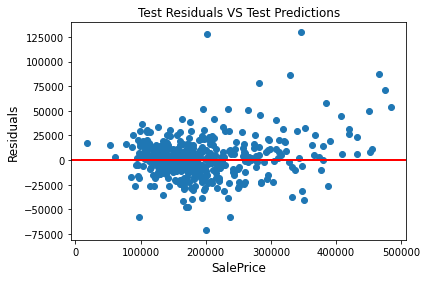

In [106]:
#residuals for y_test:
plt.scatter(predictions,residuals)
plt.title('Test Residuals VS Test Predictions')
plt.xlabel('SalePrice',fontsize=  12)
plt.ylabel('Residuals', fontsize = 12)
plt.axhline(0, c='r',linewidth = 2);

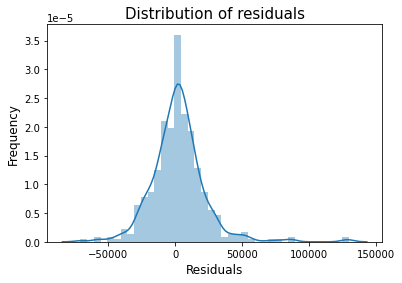

In [107]:
# Distributions of residuals:
sns.distplot(residuals)
plt.title('Distribution of residuals',fontsize = 15)
plt.xlabel('Residuals',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12);

Ideally, we would a model that results in residuals that are as close as possible to 0 which means that the differences between predicted and actual values are small thus model is highly accurate. After regularization, the residuals tend towards a normal distribution and this fulfills one of the assumptions of a linear regression and therefore inferences can be made from this model. This is a form of validation of our model.

### Generating predictions for data in `final_df_test`:

After we have trained our model using the training dataset and validated it using the test set, we would now extend its predictive abilities onto the new `final_df_test` dataset. The initial optimization of the model required the use of train and test datasets to mimic 'unseen' data and therefore it would have been less favourable to train and validate the model using the whole data before we generate our predictions

In [108]:
# Scaling the test_set dataset but leaving out the id column
final_df_test_ss = ss.transform(final_df_test.loc[:,'pid':])
# Generating predictions using our optimized model
test_set_predictions = lasso.predict(final_df_test_ss)

In [110]:
# Looking at the coefficient of each variable
coef_dict = {}
for coef, feat in zip(lasso.coef_,final_df_test.columns[1:]):
    coef_dict[feat] = coef
    
# Sorting and viewing the top features that have the strongest influence on the predictor
sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse = True)}

# Printing the top 5 features that have the strongest influence on SalePrice
{K:V for (K,V) in [x for x in sorted_coef_dict.items()][:10]}

{'gr_liv_area': 22191.687319582394,
 'overall_qual': 11179.930465788586,
 'total_bsmt_sf': 8949.906316351708,
 'bsmtfin_sf_1': 7460.471158371832,
 'year_built': 6521.625483817229,
 'car_area': 6341.149567773793,
 'lot_area': 5399.498676941318,
 'kitchen_qual_ex': 5294.91762609383,
 'neighborhood_stonebr': 5004.78990979504,
 'exter_qual_ex': 4814.058944969042}

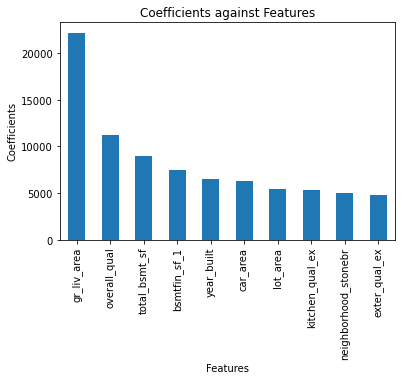

In [133]:
# Graph of coefficients against features for easier visualization and comparison
features = [a for a in sorted_coef_dict.keys()]
coef =  [i for i in sorted_coef_dict.values()]
# Plotting a bar graph for the top 10 features
pd.Series(coef[:10],index = features[:10]).plot.bar()
plt.title('Coefficients against Features')
plt.ylabel('Coefficients')
plt.xlabel('Features');

### Understanding the coefficients of features

The large coefficients of features highlight the importance of these features in predicting `saleprice`, therefore the larger the coefficients, the greater their influence on the output. Notably `gr_liv_area` and  `overall_qual` have extremely large coefficients, of 22191 and 11179 respectively. This means that for every 1 unit change in `gr_liv_area`, the `saleprice` would increase by 22191 and 11119 times respectively. However, with such large coefficients, the model might be overfitting because the model could have modelled intricate correlations to generate the output. Thus our model might have a **large bias** and a **small variance**. Whereas for features with smaller coefficients, it means that they have less influence on the output and therefore would not be important in predicting our `saleprice`

### Final submission of predicted housing prices

In [134]:
# Creating a new dataframe with 2 columns, SalePrice as the predicted prices and its corresponding Ids
submission = pd.DataFrame({'Id':final_df_test['id'], 'SalePrice':test_set_predictions}).reset_index(drop = True)

In [135]:
# Saving the submission dataset as a csv file
submission.to_csv('../datasets/submission.csv', index = False)

### Final Kaggle score

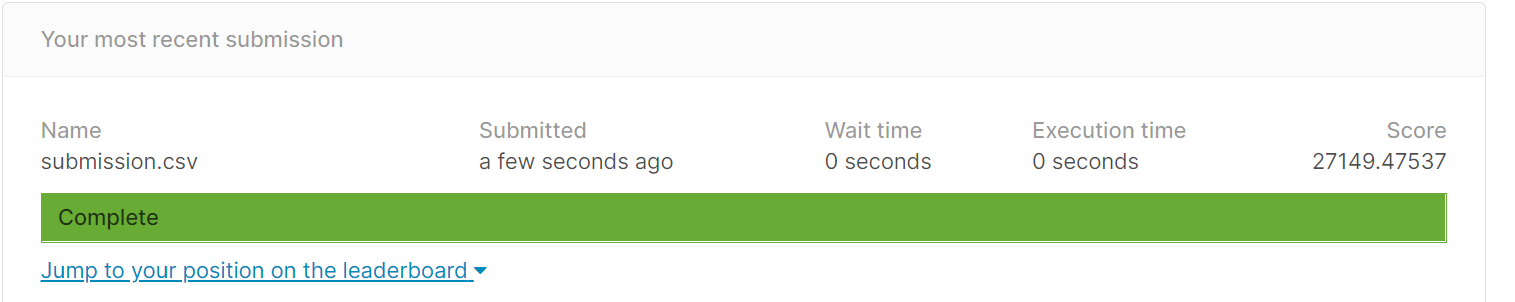

The score above shows the RMSE of the predictions generated from the test set and a lower RMSE score would reflect a more accurate prediction and thus a model that would be able to generalize well to unseen data.

## Conclusions and Recommendations

#### Important determining features 

There are several features that have displayed a strong correlation and influence on our predictor variable and the top 5 features to look out for are `gr_liv_area`, `overall_qual`, `total_bsmt_sf`,`bsmtfin_sf_1` and `year_built`. Besides numerical features, categorical features such as `kitchen_qual` and `neighborhood` were also identified to have a strong impact on the cost of houses. Since most of the features are fed into the model, this model shows a low bias and a high variance with respect to houses in Ames,Iowa.


#### Translation of such knowledge into practical use

With such a knowledge, home sellers who are looking to maximize their profits could leverage on these features to negotiate for a higher selling price if their houses are generally **larger and newer** due to other features such as `car_area` and `lot_area` which are in the top ranks in terms of correlation too. Moreover, this data suggests that there is an ongoing increase in housing prices which is consistent with the shortage of houses in Ames that citizens are facing. This is because such demand would drive up the cost of houses.

#### Versatility of model

Besides a qualitative estimate of the impact of the listed features, this model provides a highly accurate **quantitative increment** in housing prices for every unit change in the variables included.
Besides numerical features, the influence of categorical features could also be analyzed and validated through encoding categorical classes. Therefore, with such an algorithm, it would be useful for home owners to make well-informed decisions when purchasing or selling their properties. 

#### Limitations of this model

Several of the features such as `kitchenqual` and `overall_qual` are nominal variables and subjected to the bias of the person who filled in the values. It would be easy for home owners to exploit such a feature and therefore over-promise in terms of the condition of their houses which would drive the prices of houses up. Moreover, it is easily exploitable since `overall_qual` is one of the strongest features in determining housing prices. Thus it would be more feasible to collect data that is numerical and quantifiable. In addition, this model would be able to account for the ongoing challenges that citizens are facing such as a growing population which was attributed to the influx of students in Iowa State University. This in turn results in a higher number of staffs that the university hires and therefore further increasing the demand for a larger population. In addition, the increasing lack of space reduces the number of houses built and thus the trend that has been seen in the past few years might not be relevant to the future if such considerations are not taken into account.

## References:


Building Ames: Where the housing market stands today. (n.d.). Retrieved September 18, 2020, from https://www.amestrib.com/article/20160521/News/305219982